# Time Series Forecasting using ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [2]:
air_passanger = get_rdataset("AirPassengers").data["value"]
air_passanger

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

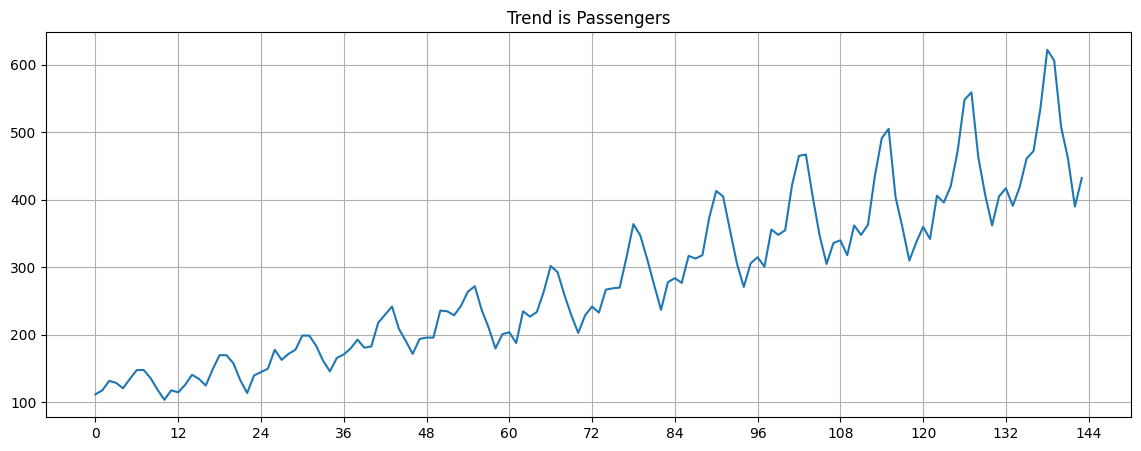

In [4]:
plt.figure(figsize=(14, 5))
plt.plot(air_passanger)
plt.xticks(range(0, 145, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [5]:
model = ARIMA(air_passanger, order=(5, 3, 4))

In [6]:
# order=(5, 3, 4)) = (P, D, Q)

In [7]:
output = model.fit()

In [8]:
forecast = output.get_forecast(steps=12)

In [10]:
forecast.predicted_mean

144    466.346374
145    446.614457
146    402.265596
147    344.949531
148    316.335023
149    335.853243
150    362.896600
151    353.057163
152    302.233451
153    243.402272
154    218.642058
155    235.680896
Name: predicted_mean, dtype: float64

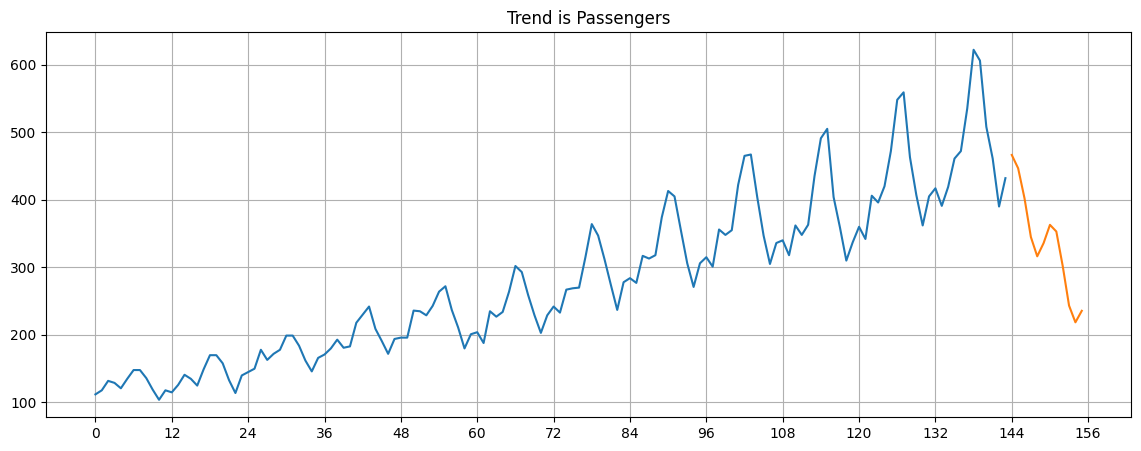

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(air_passanger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0, 157, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [12]:
error = output.aic
error

np.float64(1391.953588916123)

In [13]:
best_order = None
min_aic = np.inf

In [15]:
for p in range(8, 13):
    for d in range(1, 4):
        for q in range(5, 10):
            m = ARIMA(air_passanger, order=(p, d, q))
            res = m.fit()

            if res.aic < min_aic:
                min_aic = res.aic
                best_order = (p, d, q)

In [16]:
best_order

(11, 2, 7)

In [17]:
min_aic

np.float64(1140.068743325428)

In [18]:
model = ARIMA(air_passanger, order=best_order)

In [19]:
result = model.fit()

In [21]:
forecast = result.get_forecast(steps=12)

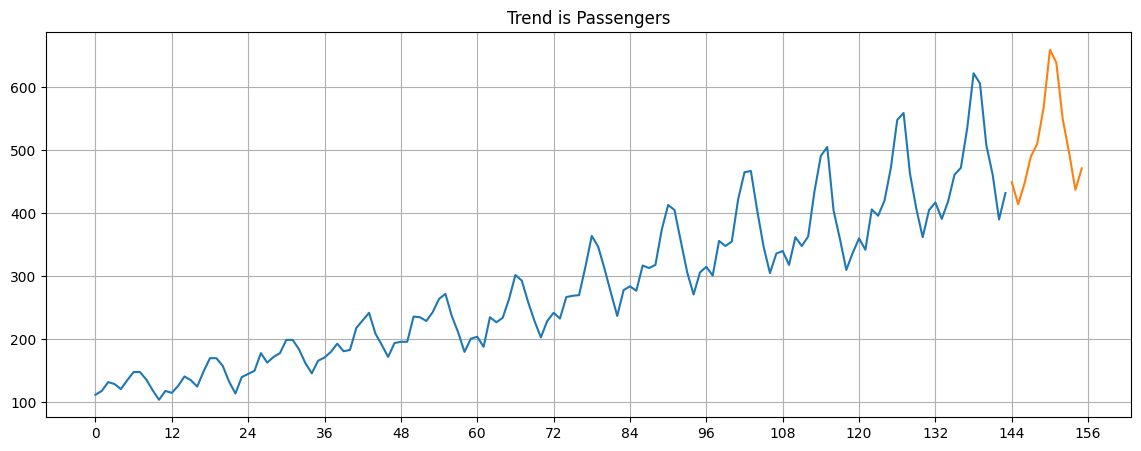

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(air_passanger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0, 157, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [23]:
forecast = result.get_forecast(steps=36)

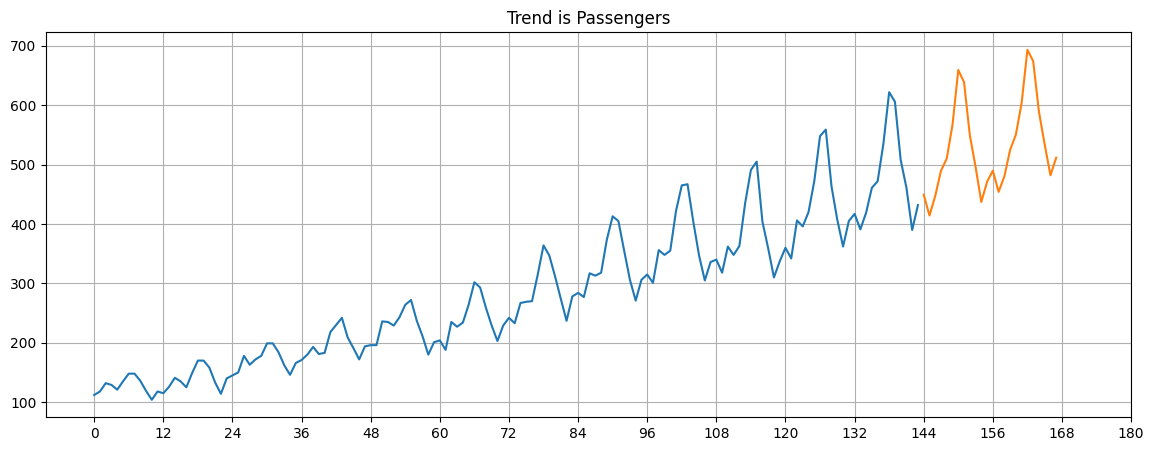

In [24]:
plt.figure(figsize=(14, 5))
plt.plot(air_passanger)
plt.plot(forecast.predicted_mean)
plt.xticks(range(0, 181, 12))
plt.title("Trend is Passengers")
plt.grid()
plt.show()

In [25]:
forecast.predicted_mean

144    449.341728
145    414.257642
146    447.238744
147    489.852292
148    510.296080
149    567.306423
150    659.303224
151    638.905535
152    549.686503
153    496.328914
154    437.055844
155    471.165989
156    489.815465
157    454.086982
158    480.209866
159    524.847890
160    550.601288
161    603.957388
162    693.396858
163    674.320589
164    589.043873
165    533.899495
166    482.082140
167    511.733739
Name: predicted_mean, dtype: float64